In [1]:

import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/data_aug/data_agumented.zip -d /content/

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/Train",
                                          target_size=(150,150),
                                          batch_size = 16,
                                          class_mode = 'binary')


test_dataset = test.flow_from_directory("/content/validation",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary')
                                         


Found 1606 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


In [3]:
train_dataset.class_indices

{'defect': 0, 'perfect': 1}

In [4]:

model = keras.Sequential()


model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
 
model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:

model.fit(train_dataset,
         steps_per_epoch = 100,   # total traing data (803+803)/batch size (16)
         epochs = 2,
         validation_data = test_dataset
       
         )

Epoch 1/2
100/100 [==============================] - 83s 824ms/step - loss: 0.6215 - accuracy: 0.6203 - val_loss: 4.8421e-08 - val_accuracy: 1.0000
Epoch 2/2
100/100 [==============================] - 81s 812ms/step - loss: 2.3548e-07 - accuracy: 1.0000 - val_loss: 2.6194e-07 - val_accuracy: 1.0000


In [14]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("perfect",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("defect",fontsize=30)

[[0.]]


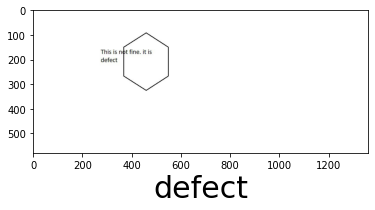

In [19]:
predictImage("/content/388342.jpg")
plt.imshow(image.load_img("/content/388342.jpg"))

[[0.]]


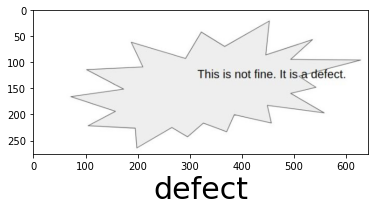

In [24]:
predictImage("/content/fkfkd.jpg")
plt.imshow(image.load_img("/content/fkfkd.jpg"))

[[1.]]


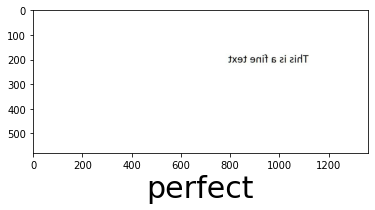

In [25]:
predictImage("/content/484160.jpg")
plt.imshow(image.load_img("/content/484160.jpg"))

[[1.]]


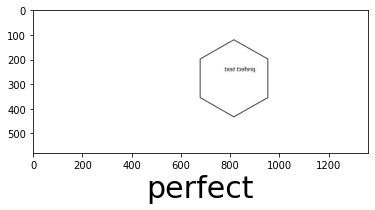

In [26]:
predictImage("/content/505282.jpg")
plt.imshow(image.load_img("/content/505282.jpg"))

[[0.]]


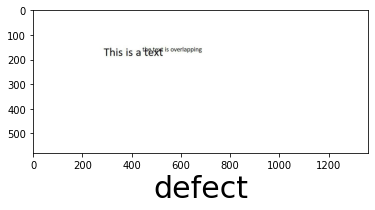

In [21]:
predictImage("/content/291945.jpg")
plt.imshow(image.load_img("/content/291945.jpg"))

[[0.]]


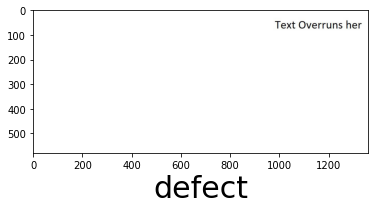

In [22]:
predictImage("/content/385104.jpg")
plt.imshow(image.load_img("/content/385104.jpg"))

[[1.]]


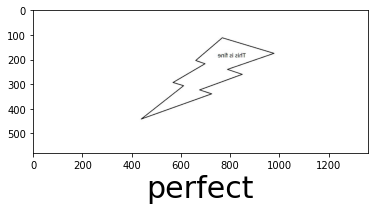

In [23]:
predictImage("/content/16309.jpg")
plt.imshow(image.load_img("/content/16309.jpg"))